<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-05-19-Logistic/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from mlxtend.plotting import plot_decision_regions

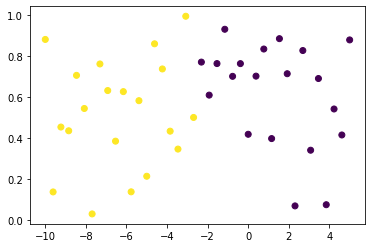

In [37]:
x1 = np.linspace(-10, 5, 40)
x2 = np.random.rand(x1.size)

y = np.where((x1+x2) < -2, 1, 0)

plt.scatter(x1, x2, c=y)

In [38]:
X = pd.DataFrame([x1, x2]).T

In [39]:
Y = pd.Series(y)

In [40]:
from IPython.display import clear_output

In [43]:
class LogisticRegressionScratch():

    def __init__(self, learning_rate=0.01, iterations=100):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        m, n = X.shape # m = number of instances
        
        self.W = np.random.randn(n)
        self.b = np.random.rand(1)[0]

        for i in range(self.iterations):
            A = self.predict(X)
            tmp = A - Y.T
            tmp = np.reshape(tmp, m)
            dW = np.dot(X.T, tmp) / m
            db = np.sum(tmp) / m

            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db

            if i%10 == 0:
              clear_output(wait = True)
              plot_decision_regions(X = X.values, y=y, clf = self)
              plt.title(i)
              plt.show()
    
    def predict(self, X):
        return self.sigmoid(X.dot(self.W) + self.b)

    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))

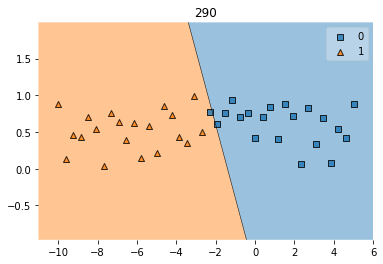

In [54]:
model = LogisticRegressionScratch(learning_rate=0.1, iterations=300)
model.fit(X, Y)

In [55]:
pred = model.predict(X)

In [56]:
pred = np.where(pred>0.5, 1, 0)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


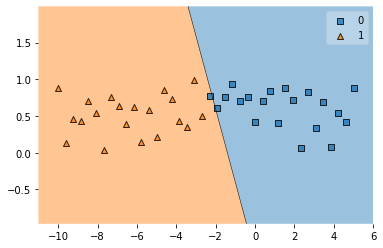

In [58]:
plot_decision_regions(X = X.values, y=Y.values, clf = model)

# Project

Use Sklearn Logistic Regression

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [59]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

df.sample(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
636,5,104,74,0,0,28.8,0.153,48,0
596,0,67,76,0,0,45.3,0.194,46,0
738,2,99,60,17,160,36.6,0.453,21,0
602,1,124,74,36,0,27.8,0.100,30,0
541,3,128,72,25,190,32.4,0.549,27,1
178,5,143,78,0,0,45.0,0.190,47,0
693,7,129,68,49,125,38.5,0.439,43,1


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral 
glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) 


Age: Age (years)

Outcome: Class variable ( 0 - 1)

In [60]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [61]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


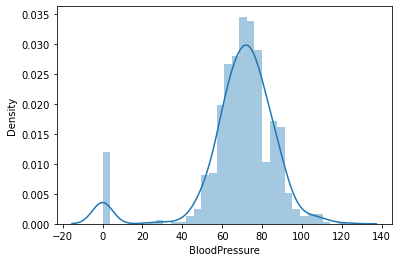

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


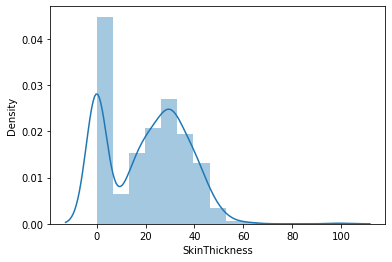

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


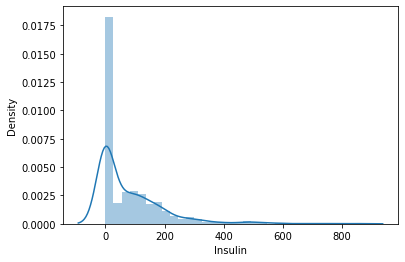

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


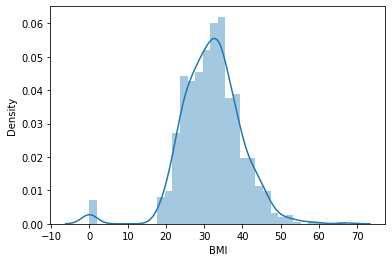

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


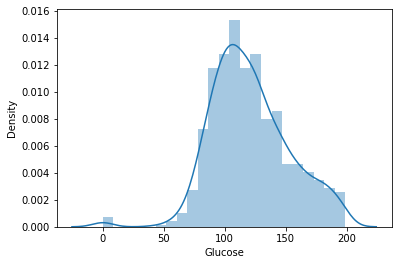

In [62]:
for col in ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose']:
  sns.distplot(df[col])
  plt.show()

In [63]:
for col in ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose']:
  df[col] = df[col].replace(to_replace=0, value=df[col].median())

In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


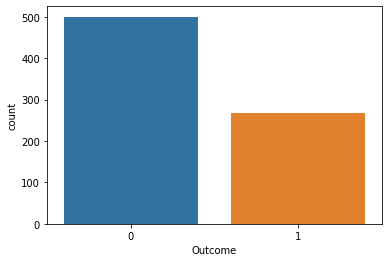

In [65]:
sns.countplot(df['Outcome'])

## **Feature Engineering**

In [67]:
def set_bmi(row):
    if row < 18.5:
        return "Under"
    elif row <= 24.9:
        return "Healthy"
    else:
        return "Over"

df['BMI_STAT'] = df["BMI"].apply(set_bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


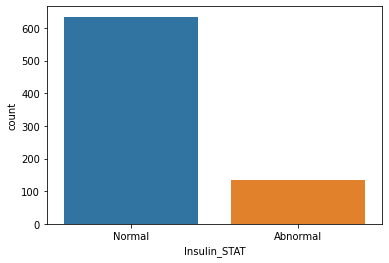

In [68]:
def set_insulin(row):
    if row >= 16 and row <= 166:
        return "Normal"
    else:
        return "Abnormal"

df['Insulin_STAT'] = df['Insulin'].apply(set_insulin)

sns.countplot(df['Insulin_STAT'])

## Preprocessing

In [82]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_STAT,Insulin_STAT
523,9,130,70,23,30.5,34.2,0.652,45,1,Over,Normal
36,11,138,76,23,30.5,33.2,0.420,35,0,Over,Normal
192,7,159,66,23,30.5,30.4,0.383,36,1,Over,Normal


In [83]:
X = df.drop(columns = ['Outcome'])
Y = df['Outcome']

In [84]:
from sklearn.preprocessing import OrdinalEncoder

order = ['Healthy', 'Under', 'Over']

od = OrdinalEncoder(categories = [order])
X[['BMI_STAT']] = od.fit_transform( X[ ['BMI_STAT'] ] )

In [85]:
X = X.join(pd.get_dummies(X[['Insulin_STAT']], drop_first=True))

X.drop(['Insulin_STAT'], axis = 1, inplace = True)
X.sample(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_STAT,Insulin_STAT_Normal
431,3,89,74,16,85.0,30.4,0.551,38,2.0,1
517,7,125,86,23,30.5,37.6,0.304,51,2.0,1
387,8,105,100,36,30.5,43.3,0.239,45,2.0,1
72,13,126,90,23,30.5,43.4,0.583,42,2.0,1


In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   BMI_STAT                  768 non-null    float64
 9   Insulin_STAT_Normal       768 non-null    uint8  
dtypes: float64(4), int64(5), uint8(1)
memory usage: 54.9 KB


In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = StandardScaler().fit_transform(X)

## TRAINING AND TESTING OF DATA

In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=16)

In [89]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [90]:
model.score(X_test,y_test)

0.7662337662337663

In [93]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


parameters = {'C':[0.0001, 10, 100], 'penalty':['l1', 'l2', 'none'],}

etree = LogisticRegression()

clf = GridSearchCV(etree, parameters, n_jobs=-1)
clf.fit(X, Y)

result = clf.cv_results_

result = [(p, s) for p,s in zip(result['params'], result['mean_test_score'])]
result.sort(key=lambda key:key[1])

for param, score in result:
    print(score,'\t', param)

nan 	 {'C': 0.0001, 'penalty': 'l1'}
0.6510482981071216 	 {'C': 0.0001, 'penalty': 'l2'}
0.7630506748153807 	 {'C': 0.0001, 'penalty': 'none'}
nan 	 {'C': 10, 'penalty': 'l1'}
0.7630506748153807 	 {'C': 10, 'penalty': 'l2'}
0.7630506748153807 	 {'C': 10, 'penalty': 'none'}
nan 	 {'C': 100, 'penalty': 'l1'}
0.7630506748153807 	 {'C': 100, 'penalty': 'l2'}
0.7630506748153807 	 {'C': 100, 'penalty': 'none'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver